In [96]:
%load_ext autoreload
%autoreload 2
import os

from mair_tools import notebook_utils
from mair_tools import papers_processing
import spacy 
from tqdm import tqdm
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import gensim
from spacy import displacy
from collections import Counter

tqdm.pandas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
INPUT_FOLDER = "../arxiv_dump/cleaned_texts/"
NOUNS = ['fairness', 'explanation', 'bias']

input_files_pattern = os.path.join(INPUT_FOLDER, "*.txt")

In [5]:
df = notebook_utils.load_texts_as_df(input_files_pattern)
df

,text
2004.02353v2,Abstract While machine learning techniques...
2007.14677v1,Abstract—Data quality is a signiﬁcant issue fo...
2005.06898v2,Abstract. Algorithmic bias has the capacity to...
2009.06433v1,Abstract This paper systematically derives des...
2004.04019v1,Abstract We present a timely and novel methodo...
...,...
1909.12367v1,ABSTRACT Understanding black-box machine learn...
2008.04448v1,"Abstract—With the advent of Industry 4.0, Data..."
2001.10056v1,"Abstract Recently, the term explainable AI bec..."
2005.10284v4,Abstract Machine learning models have been suc...


In [8]:
en=spacy.load('en_core_web_lg')
#en=spacy.load('en_core_web_sm')

docs = df.text[:20].progress_apply(en)

100%|██████████| 20/20 [00:36<00:00,  1.80s/it]


## Most common lemmas

100%|██████████| 20/20 [00:00<00:00, 295.82it/s]


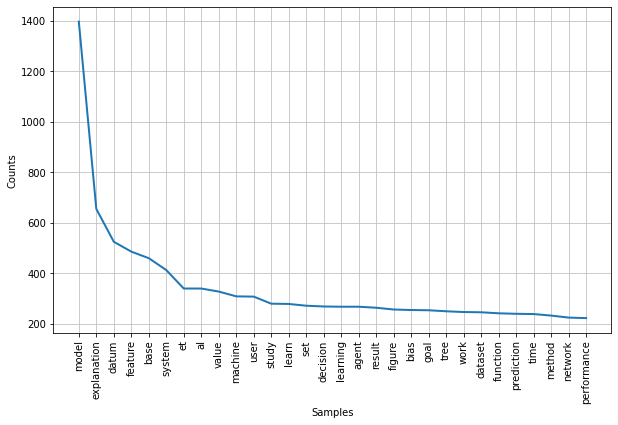

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [85]:
lemmas = docs.progress_apply(
    papers_processing.get_lemmas)
all_lemas = []
for l in lemmas:
    all_lemas+=l
    
unigrams = nltk.FreqDist(all_lemas)
plt.figure(figsize=(10,6))

unigrams.plot(30)

## Keywords

100%|██████████| 20/20 [00:00<00:00, 9626.59it/s]


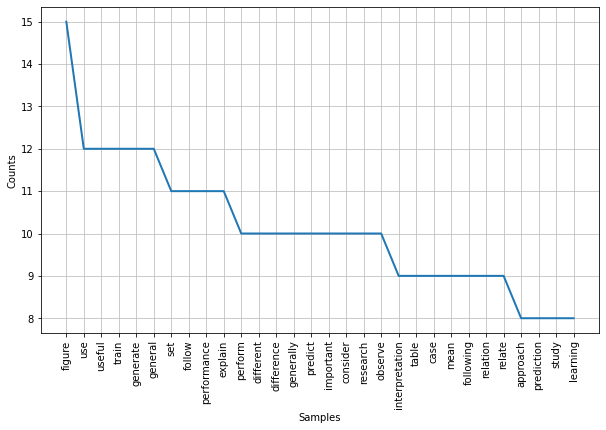

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
keywords = lemmas.progress_apply(" ".join).apply(gensim.summarization.keywords).str.split('\n')
all_keywords = []
for k in keywords:
    all_keywords+=k
plt.figure(figsize=(10,6))
nltk.FreqDist(all_keywords).plot(30)

# Nouns analysis

In [44]:
noun = NOUNS[0]

## Sentences with noun

In [61]:
found_sents = []
for doc in docs:
    for sent in doc.sents:
        for token in sent:
            if token.lemma_ == noun:
                found_sents.append(sent)
                break
                
len(found_sents)

25

In [60]:
found_sents

[dress such issues have involved testing learned associations, integrating concepts of fairness to machine learning, and performing more rigorous analysis of training data.,
 The introduction of concepts of fairness to machine learning and modifying learned associations in algorithms have been used to address gender bias .,
 Only one paper (Cabrera et al. ) discussed accountability in terms of fairness and mitigating bias.,
 In a regime of algorithmic accountability, insurers should be held responsible for their pricing models in terms of transparency, fairness and solidarity.,
 This work is the ﬁrst large-scale fairness analysis of the dynamic pricing algorithms used by ridehailing applications.,
 As the use of algorithmic dynamic pricing increases, unintended consequences such as racially based price disparities, as in the case of the Princeton Review , must be found and accounted for to ensure the fairness of service pricing.,
 This is the ﬁrst analysis of the fairness of ridehailin

In [91]:
lemmas = list(map(papers_processing.get_lemmas, found_sents))
sents_all_words = []
for l in lemmas:
    sents_all_words+=l

### Words in sentences with noun

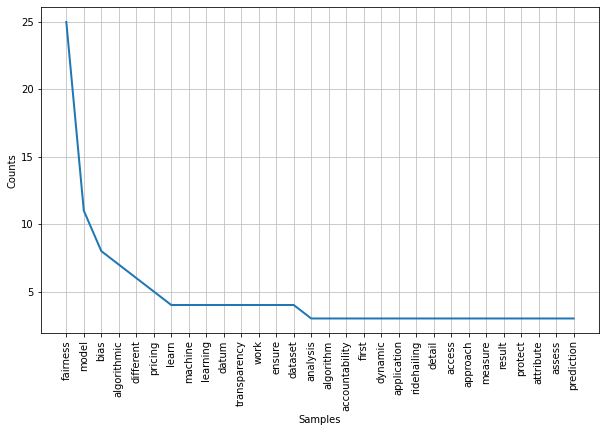

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [94]:
plt.figure(figsize=(10,6))
nltk.FreqDist(sents_all_words).plot(30)

## Noun chunks with noun 

Noun and descriptions

In [62]:
found_chunks = []
for doc in docs:
    for noun_chunk in doc.noun_chunks:
        for token in noun_chunk:
            if token.lemma_ == noun:
                found_chunks.append(noun_chunk)
                break
len(found_chunks)

24

In [63]:
found_chunks

[fairness,
 fairness,
 fairness,
 fairness,
 the ﬁrst large-scale fairness analysis,
 the fairness,
 the fairness,
 the fairness,
 fairness,
 a fairness audit,
 fairness,
 fairness,
 more than 20 fairness notions,
 algorithmic fairness,
 fairness,
 fairness,
 individual fairness,
 individual fairness,
 fairness,
 individual fairness,
 fairness,
 fairness,
 fairness score,
 the fairness]

## Noun heads analysis

What is noun describing

In [84]:
heads = []

for sent in found_sents:
    for token in sent: 
        if token.lemma_ == noun:
            head = token.head
            heads.append(head)

In [83]:
heads

[of,
 of,
 of,
 transparency,
 analysis,
 ensure,
 of,
 ensure,
 on,
 audit,
 with,
 of,
 notions,
 ensuring,
 codes,
 inspect,
 inspecting,
 to,
 transparency,
 assess,
 transparency,
 interpretability,
 al,
 score,
 evaluate]

In [78]:
displacy.render(sent, style='dep')

# NER analysis

In [99]:
entities = [
    ent
    for doc in docs
    for ent in doc.ents
    if ent.label_ not in {"CARDINAL", "DATE", "TIME", "ORDINAL", "MONEY", "PERCENT"}
]

labels = Counter([ent.label_ for ent in entities])
labels

Counter({'PRODUCT': 284,
         'ORG': 1820,
         'PERSON': 947,
         'GPE': 284,
         'LAW': 163,
         'WORK_OF_ART': 44,
         'NORP': 107,
         'LOC': 24,
         'LANGUAGE': 9,
         'QUANTITY': 25,
         'EVENT': 14,
         'FAC': 27})

In [104]:
#entities

## Organisations

In [105]:
[ent for ent in entities if ent.label_=='ORG']

[Google,
 Wells Fargo Bank,
 xNN,
 xNN,
 Weill,
 Google,
 xNN,
 xNN,
 𝑔1(𝜷1 𝑇,
 xNN,
 xNN,
 Cortes,
 Cortes,
 NN,
 GPU,
 TPU,
 AxNNs,
 Dodge,
 GAM,
 ∑ 𝑁,
 RELU,
 𝐽2                                                                    ,
 xNN,
 xNN,
 xNN,
 PDP,
 ∈ 𝑆,
 xNN,
 𝜷3,1 𝑇,
 Google,
 AdaNet,
 Weill,
 AdaNet,
 TensorFlow,
 Abadi,
 SNN,
 MSE,
 MSE,
 Sorokina,
 xNN,
 xNN,
 NN,
 RF,
 FFNN,
 applied,(𝑥4,
 Adam-Bourdarios,
 xNN,
 AUC,
 PDP,
 RF,
 fico,
 ltv,
 FFNN,
 fico0,
 ltv_fcast,
 fico0,
 fico0,
 ltv_fcast,
 ltv_fcast,
 ltv_cast,
 fico0,
 fico0,
 ltv_fcast,
 Higgs-Boson,
 xNN,
 Wells  Fargo,
 Edge Computing,
 EC,
 IoT,
 IoT,
 Edge Computing,
 EC,
 EC,
 IoT,
 EC,
 EC,
 EC,
 Naive Bayesian Classiﬁer,
 NBC,
 G L,
 PFI,
 Shapley,
 an Artiﬁcial Neural Network,
 ANN,
 ANN,
 IoT,
 Data Quality,
 ML,
 Android,
 Random Forests,
 Vector Machines,
 Multi-Layer Perceptron,
 EC,
 Support Vector Machine,
 SVM,
 XAI,
 XAI,
 N,
 Dl,
 x2,
 users/,
 NBC,
 NBC,
 PFI,
 Shapley,
 NBC,
 ANN,
 NBC,
 ANN,
